# Analitika Media Sosial
## Ujian Tengah Semester 
## Kelompok A12.6501
* A12.2020.06364
* Agung Kurniawan

# Proses Mengambil Data Dari Twiter

## load library

In [1]:
import pandas as pd
import time
import tweepy
import numpy as np

## outentifikasi dan hak akses

In [2]:
def twitter_config():
    """
    Fungsi utilitas untuk mengkonfigurasi konsumsi file API Twitter dengan␣
    ,!kunci yang disediakan.
    """
    # Otentikasi dan akses menggunakan kunci:
    auth = tweepy.OAuthHandler("TZdvNUurG6MSIzxuYTlZMOM72",
    "eQxZiDCi978SEx12Q7CBJ1l65hivaxUyPCdQZ2U1zNdQbHz6TU")
    auth.set_access_token("1572477411916402688-bnFJjEFGqjC6PmCOo55zeTPWwmV5pQ",
    "tz8xMrwG137fU3QSOGCYP24cJSBhTQJzYbfvjxMMqoDbJ")
    # Kembalikan akses ke API:
    api = tweepy.API(auth)
    try:
        api.verify_credentials()
        print("Authentication OK")
    except:
        print("Error during authentication")
    return api

In [3]:
extractor = twitter_config()

Authentication OK


## masukan username yang ingin diambil datanya

In [4]:
tweets = extractor.user_timeline(screen_name="NarasiNewsroom", count=100)
print("Tweets terambil: {}.\n".format(len(tweets)))


print("5 tweet teratas:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Tweets terambil: 100.

5 tweet teratas:

Lagi, korban kanjuruhan bertambah satu. Kini korban meninggal berjumlah 135 orang. 😥

Sementara, hingga sekarang ny… https://t.co/ER0J82nrCs

Kok gitu ya, kan menyuarakan kenyataan yang sesungguhnya pas menjabat di Twitter, eh malah dipecat 😕

Mirip di mana… https://t.co/vxU9e72kxL

Obat gagal ginjal yang tergolong langka ini langsung didatangkan dari Singapura dan Australia. Kira-kira efektif en… https://t.co/DczZ9d5T7a

Kata pemerintah sih, IKN banyak diburu investor 🤔

| Narasi Daily https://t.co/pyvtAkQ0kM

Dalam kongres ini, Xi Jinping terpilih menjadi Sekjen Partai Komunis China. Hal ini akan menjadi kesempatan bagi Xi… https://t.co/zRdFN5Ipn0



## masuk ke data frame pandas

In [5]:
# Kita dapat membuat kerangka data sebagai berikut:
dataset = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# Kami membuat tampilan kerangka data:
display(dataset.head(10))

,Tweets
0,"Lagi, korban kanjuruhan bertambah satu. Kini k..."
1,"Kok gitu ya, kan menyuarakan kenyataan yang se..."
2,Obat gagal ginjal yang tergolong langka ini la...
3,"Kata pemerintah sih, IKN banyak diburu investo..."
4,"Dalam kongres ini, Xi Jinping terpilih menjadi..."
5,Pemerintah China sendiri belum memberi pernyat...
6,Dalam hari pertama penyelenggaraan kongres tan...
7,"Hu Jintao, mantan presiden China 2003 - 2013 d..."
8,Siapa yang ikutan beli karena konten Corkcicle...
9,Jadi kamu lebih milih melapor keluhan lewat JA...


In [ ]:
dataset.to_csv('dataset_narasi.csv',sep=';')

# Preprocesing Tahap 00

## load library

In [6]:
import re
import string
import time
from copy import deepcopy

## load dataset

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('dataset_narasi_fixlabel.csv',sep=';')
df.head()

,Column1,Unnamed: 0,Tweets,Label
0,0,0,Ketua DPP PHRI DKI Jakarta Sutrisno Iwantono b...,1
1,1,1,"Soalnya, RKUHP yang baru berisi pasal perzinah...",1
2,2,2,"#Semuabisakena. Inget, kan, sama kampanye peno...",1
3,3,3,"Gugatannya udah kalah. Selanjutnya, Pak Jokowi...",1
4,4,4,Semoga aja amunisi Kominfo bisa efektif buat n...,0


## hapus kolom 'Column1' dan 'Unnamed: 0' karena tidak terpakai

In [9]:
df = df.drop(['Column1'], axis=1)

In [11]:
df = df.drop(['Unnamed: 0'], axis=1)

In [12]:
df.head()

,Tweets,Label
0,Ketua DPP PHRI DKI Jakarta Sutrisno Iwantono b...,1
1,"Soalnya, RKUHP yang baru berisi pasal perzinah...",1
2,"#Semuabisakena. Inget, kan, sama kampanye peno...",1
3,"Gugatannya udah kalah. Selanjutnya, Pak Jokowi...",1
4,Semoga aja amunisi Kominfo bisa efektif buat n...,0


# Preprocessing Tahap 01

## Proses penataan data
saya menggunakan ekphrasis

In [13]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['email', 'percent', 'money', 'phone', 'user',
        'time', 'date', 'number'],
    # terms that will be annotated
    #annotate={"hashtag", "allcaps", "elongated", "repeated",'emphasis', 'censored'},
    annotate={"hashtag"},
    fix_html=True,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)


C:\Users\HP\anaconda3\lib\site-packages\ekphrasis\classes\tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...


C:\Users\HP\anaconda3\lib\site-packages\ekphrasis\classes\exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


## melakukan pembersihan elemen yang tidak digunakan

In [14]:
def bersih_data(text):
    return " ".join(text_processor.pre_process_doc(text))
def non_ascii(text):
    return text.encode('ascii', 'replace').decode('ascii')

def remove_space_alzami(text):
    return " ".join(text.split())

def remove_emoji_alzami(text):
    return ' '.join(re.sub("([x#][A-Za-z0-9]+)"," ", text).split())

def remove_tab(text):
    return text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")

def remove_tab2(text):
    return re.sub('\s+',' ',text)

def remove_rt(text):
    return text.replace('RT'," ")

def remove_mention(text):
    return ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())

def remove_incomplete_url(text):
    return text.replace("http://", " ").replace("https://", " ")

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def remove_excessive_dot(text):
    return text.replace('..'," ")

def change_stripe(text):
    return text.replace('-'," ")

def lower(text):
    return text.lower()

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def remove_excessive_dot(text):
    return text.replace('..'," ")

def lower(text):
    return text.lower()

def remove_whitespace_LT(text):
    return text.strip()

def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

def remove_punctuation(text):
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    return re.sub(pattern, "", text) 
def remove_number_eks(text):
    return text.replace('<number>'," ")

def remove_angka(text):
    return re.sub(r"\d+", "", text) 

def remove_URL_eks(text):
    return text.replace('URL'," ").replace('url'," ")

def space_punctuation(text):
    return re.sub('(?<! )(?=[.,!?()])|(?<=[.,!?()])(?! )', r' ', text)

## melakukan pembersihan dengan memangil fungsi diatas

In [15]:
i = 0
final_string = []
s = ""
for text in df['Tweets'].values:
    filteredSentence = []
    EachReviewText = ""
    proc = remove_rt(text)
    proc = lower(proc)
    proc = change_stripe(proc)
    proc = remove_emoji_alzami(proc)
    proc = remove_tab(proc)
    proc = remove_tab2(proc)
    proc = non_ascii(proc)
    proc = remove_incomplete_url(proc)
    proc = remove_excessive_dot(proc)
    proc = remove_whitespace_LT(proc)
    proc = remove_whitespace_multiple(proc)
    proc = remove_single_char(proc)
    proc = space_punctuation(proc)
    proc = remove_punctuation(proc)
    proc = remove_space_alzami(proc)
    proc = bersih_data(proc)
    proc = remove_number_eks(proc)
    proc = remove_angka(proc) 
    proc = remove_URL_eks(proc)
    EachReviewText = proc
    final_string.append(EachReviewText)

In [16]:
df["step01"] = final_string
df.head()

,Tweets,Label,step01
0,Ketua DPP PHRI DKI Jakarta Sutrisno Iwantono b...,1,ketua dpp phri dki jakarta sutrisno iwantono b...
1,"Soalnya, RKUHP yang baru berisi pasal perzinah...",1,soalnya rkuhp yang baru berisi pasal perzinaha...
2,"#Semuabisakena. Inget, kan, sama kampanye peno...",1,inget kan sama kampanye penolakan rancangan un...
3,"Gugatannya udah kalah. Selanjutnya, Pak Jokowi...",1,gugatannya udah kalah selanjutnya pak jokowi d...
4,Semoga aja amunisi Kominfo bisa efektif buat n...,0,semoga aja amunisi kominfo bisa efektif buat n...


## hapus data kosong

In [19]:
df_hapus = df[~df['step01'].str.contains(" ")]
df_hapus.head()

,Tweets,Label,step01


In [20]:
df_new = df[~df.isin(df_hapus)].dropna()

In [21]:
df_new

,Tweets,Label,step01
0,Ketua DPP PHRI DKI Jakarta Sutrisno Iwantono b...,1,ketua dpp phri dki jakarta sutrisno iwantono b...
1,"Soalnya, RKUHP yang baru berisi pasal perzinah...",1,soalnya rkuhp yang baru berisi pasal perzinaha...
2,"#Semuabisakena. Inget, kan, sama kampanye peno...",1,inget kan sama kampanye penolakan rancangan un...
3,"Gugatannya udah kalah. Selanjutnya, Pak Jokowi...",1,gugatannya udah kalah selanjutnya pak jokowi d...
4,Semoga aja amunisi Kominfo bisa efektif buat n...,0,semoga aja amunisi kominfo bisa efektif buat n...
...,...,...,...
95,Kenapa sih maksa banget jadwal pertandingan di...,1,kenapa sih maksa banget jadwal pertandingan di...
96,Kelima terdakwa dalam kasus pembunuhan Yosua t...,1,kelima terdakwa dalam kasus pembunuhan yosua t...
97,Lembaga Perlindungan Saksi dan Korban (LPSK) m...,1,lembaga perlindungan saksi dan korban lpsk men...
98,"Eliezer beserta Ferdy Sambo, Putri Candrawathi...",1,eliezer beserta ferdy sambo putri candrawathi ...


## melakukan proses normalisasi kata Slang menjadi kata Baku
saya menggunakan NLTK pada proses normalisasi kata

In [22]:
import nltk
from nltk.tokenize import word_tokenize

In [23]:
def word_tokenize_wrapper(text):
  return word_tokenize(text)

In [25]:
df_new['tokens'] = df['step01'].apply(word_tokenize_wrapper)
df_new.head()

,Tweets,Label,step01,tokens
0,Ketua DPP PHRI DKI Jakarta Sutrisno Iwantono b...,1,ketua dpp phri dki jakarta sutrisno iwantono b...,"[ketua, dpp, phri, dki, jakarta, sutrisno, iwa..."
1,"Soalnya, RKUHP yang baru berisi pasal perzinah...",1,soalnya rkuhp yang baru berisi pasal perzinaha...,"[soalnya, rkuhp, yang, baru, berisi, pasal, pe..."
2,"#Semuabisakena. Inget, kan, sama kampanye peno...",1,inget kan sama kampanye penolakan rancangan un...,"[inget, kan, sama, kampanye, penolakan, rancan..."
3,"Gugatannya udah kalah. Selanjutnya, Pak Jokowi...",1,gugatannya udah kalah selanjutnya pak jokowi d...,"[gugatannya, udah, kalah, selanjutnya, pak, jo..."
4,Semoga aja amunisi Kominfo bisa efektif buat n...,0,semoga aja amunisi kominfo bisa efektif buat n...,"[semoga, aja, amunisi, kominfo, bisa, efektif,..."


In [26]:
normalized_word = pd.read_csv('kamus_clean.csv')

In [27]:
normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

In [28]:
df_new['final_tokens'] = df_new['tokens'].apply(normalized_term)

In [29]:
i=0
final_string_tokens = []
for text in df_new['final_tokens'].values:
    EachReviewText = ""
    EachReviewText = ' '.join(text)
    final_string_tokens.append(EachReviewText)

In [30]:
df_new["step02"] = final_string_tokens
df_new.head()

,Tweets,Label,step01,tokens,final_tokens,step02
0,Ketua DPP PHRI DKI Jakarta Sutrisno Iwantono b...,1,ketua dpp phri dki jakarta sutrisno iwantono b...,"[ketua, dpp, phri, dki, jakarta, sutrisno, iwa...","[ketua, dpp, phri, dki, jakarta, sutrisno, iwa...",ketua dpp phri dki jakarta sutrisno iwantono b...
1,"Soalnya, RKUHP yang baru berisi pasal perzinah...",1,soalnya rkuhp yang baru berisi pasal perzinaha...,"[soalnya, rkuhp, yang, baru, berisi, pasal, pe...","[soalnya, rkuhp, yang, baru, berisi, pasal, pe...",soalnya rkuhp yang baru berisi pasal perzinaha...
2,"#Semuabisakena. Inget, kan, sama kampanye peno...",1,inget kan sama kampanye penolakan rancangan un...,"[inget, kan, sama, kampanye, penolakan, rancan...","[inget, kan, sama, kampanye, penolakan, rancan...",inget kan sama kampanye penolakan rancangan un...
3,"Gugatannya udah kalah. Selanjutnya, Pak Jokowi...",1,gugatannya udah kalah selanjutnya pak jokowi d...,"[gugatannya, udah, kalah, selanjutnya, pak, jo...","[gugatannya, udah, kalah, selanjutnya, pak, jo...",gugatannya udah kalah selanjutnya pak jokowi d...
4,Semoga aja amunisi Kominfo bisa efektif buat n...,0,semoga aja amunisi kominfo bisa efektif buat n...,"[semoga, aja, amunisi, kominfo, bisa, efektif,...","[semoga, aja, amunisi, kominfo, bisa, efektif,...",semoga aja amunisi kominfo bisa efektif buat n...


In [37]:
df_new.to_csv('clean_dataset_narasi_fixlabel.csv',sep=';')

# Proses Stemming Menggunakan Sastrawi

## load sastrawi

In [38]:
import pandas as pd

In [39]:
dataset = pd.read_csv('clean_dataset_narasi_fixlabel.csv', sep=';')

In [40]:
dataset.head()

,Unnamed: 0,Tweets,Label,step01,tokens,final_tokens,step02,finalText_str
0,0,Ketua DPP PHRI DKI Jakarta Sutrisno Iwantono b...,1,ketua dpp phri dki jakarta sutrisno iwantono b...,"['ketua', 'dpp', 'phri', 'dki', 'jakarta', 'su...","['ketua', 'dpp', 'phri', 'dki', 'jakarta', 'su...",ketua dpp phri dki jakarta sutrisno iwantono b...,ketua dpp phri dki jakarta sutrisno iwantono b...
1,1,"Soalnya, RKUHP yang baru berisi pasal perzinah...",1,soalnya rkuhp yang baru berisi pasal perzinaha...,"['soalnya', 'rkuhp', 'yang', 'baru', 'berisi',...","['soalnya', 'rkuhp', 'yang', 'baru', 'berisi',...",soalnya rkuhp yang baru berisi pasal perzinaha...,soalnya rkuhp yang baru berisi pasal perzinaha...
2,2,"#Semuabisakena. Inget, kan, sama kampanye peno...",1,inget kan sama kampanye penolakan rancangan un...,"['inget', 'kan', 'sama', 'kampanye', 'penolaka...","['inget', 'kan', 'sama', 'kampanye', 'penolaka...",inget kan sama kampanye penolakan rancangan un...,inget kan sama kampanye penolakan rancangan un...
3,3,"Gugatannya udah kalah. Selanjutnya, Pak Jokowi...",1,gugatannya udah kalah selanjutnya pak jokowi d...,"['gugatannya', 'udah', 'kalah', 'selanjutnya',...","['gugatannya', 'udah', 'kalah', 'selanjutnya',...",gugatannya udah kalah selanjutnya pak jokowi d...,gugatannya udah kalah selanjutnya pak jokowi d...
4,4,Semoga aja amunisi Kominfo bisa efektif buat n...,0,semoga aja amunisi kominfo bisa efektif buat n...,"['semoga', 'aja', 'amunisi', 'kominfo', 'bisa'...","['semoga', 'aja', 'amunisi', 'kominfo', 'bisa'...",semoga aja amunisi kominfo bisa efektif buat n...,semoga aja amunisi kominfo bisa efektif buat n...


In [41]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

## proses stopwords

In [42]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
 
factory = StopWordRemoverFactory()

more_stopword = ['sih', 'nya','rt','loh','lah', 'dd', 'mah', 'nye', 'eh', 'ehh', 'ah', 'yang','yg']
 
# Tambahkan Stopword Baru
data = factory.get_stop_words()+more_stopword

stopwords_sastrawi = factory.create_stop_word_remover()

dictionary = ArrayDictionary(data)
str_stopwords = StopWordRemover(dictionary)

In [43]:
df_new['finalText_str'] = df_new['step02'].apply(str)
df_new.head()

,Tweets,Label,step01,tokens,final_tokens,step02,finalText_str
0,Ketua DPP PHRI DKI Jakarta Sutrisno Iwantono b...,1,ketua dpp phri dki jakarta sutrisno iwantono b...,"[ketua, dpp, phri, dki, jakarta, sutrisno, iwa...","[ketua, dpp, phri, dki, jakarta, sutrisno, iwa...",ketua dpp phri dki jakarta sutrisno iwantono b...,ketua dpp phri dki jakarta sutrisno iwantono b...
1,"Soalnya, RKUHP yang baru berisi pasal perzinah...",1,soalnya rkuhp yang baru berisi pasal perzinaha...,"[soalnya, rkuhp, yang, baru, berisi, pasal, pe...","[soalnya, rkuhp, yang, baru, berisi, pasal, pe...",soalnya rkuhp yang baru berisi pasal perzinaha...,soalnya rkuhp yang baru berisi pasal perzinaha...
2,"#Semuabisakena. Inget, kan, sama kampanye peno...",1,inget kan sama kampanye penolakan rancangan un...,"[inget, kan, sama, kampanye, penolakan, rancan...","[inget, kan, sama, kampanye, penolakan, rancan...",inget kan sama kampanye penolakan rancangan un...,inget kan sama kampanye penolakan rancangan un...
3,"Gugatannya udah kalah. Selanjutnya, Pak Jokowi...",1,gugatannya udah kalah selanjutnya pak jokowi d...,"[gugatannya, udah, kalah, selanjutnya, pak, jo...","[gugatannya, udah, kalah, selanjutnya, pak, jo...",gugatannya udah kalah selanjutnya pak jokowi d...,gugatannya udah kalah selanjutnya pak jokowi d...
4,Semoga aja amunisi Kominfo bisa efektif buat n...,0,semoga aja amunisi kominfo bisa efektif buat n...,"[semoga, aja, amunisi, kominfo, bisa, efektif,...","[semoga, aja, amunisi, kominfo, bisa, efektif,...",semoga aja amunisi kominfo bisa efektif buat n...,semoga aja amunisi kominfo bisa efektif buat n...


In [44]:
i=0
final_string = []
s = ""
for sentence in dataset["finalText_str"].values:
    filteredSentence = []
    EachReviewText = ""
    st = str_stopwords.remove(sentence)
    s = (stemmer.stem(st))
    filteredSentence.append(s)
    
    EachReviewText = ' '.join(filteredSentence)
    final_string.append(EachReviewText)

In [45]:
df_new.loc[:, ('ProcessedText')] = final_string
df_new.head()

,Tweets,Label,step01,tokens,final_tokens,step02,finalText_str,ProcessedText
0,Ketua DPP PHRI DKI Jakarta Sutrisno Iwantono b...,1,ketua dpp phri dki jakarta sutrisno iwantono b...,"[ketua, dpp, phri, dki, jakarta, sutrisno, iwa...","[ketua, dpp, phri, dki, jakarta, sutrisno, iwa...",ketua dpp phri dki jakarta sutrisno iwantono b...,ketua dpp phri dki jakarta sutrisno iwantono b...,ketua dpp phri dki jakarta sutrisno iwantono b...
1,"Soalnya, RKUHP yang baru berisi pasal perzinah...",1,soalnya rkuhp yang baru berisi pasal perzinaha...,"[soalnya, rkuhp, yang, baru, berisi, pasal, pe...","[soalnya, rkuhp, yang, baru, berisi, pasal, pe...",soalnya rkuhp yang baru berisi pasal perzinaha...,soalnya rkuhp yang baru berisi pasal perzinaha...,soal rkuhp baru isi pasal perzinahan anggap ru...
2,"#Semuabisakena. Inget, kan, sama kampanye peno...",1,inget kan sama kampanye penolakan rancangan un...,"[inget, kan, sama, kampanye, penolakan, rancan...","[inget, kan, sama, kampanye, penolakan, rancan...",inget kan sama kampanye penolakan rancangan un...,inget kan sama kampanye penolakan rancangan un...,inget kan sama kampanye tolak rancang undang u...
3,"Gugatannya udah kalah. Selanjutnya, Pak Jokowi...",1,gugatannya udah kalah selanjutnya pak jokowi d...,"[gugatannya, udah, kalah, selanjutnya, pak, jo...","[gugatannya, udah, kalah, selanjutnya, pak, jo...",gugatannya udah kalah selanjutnya pak jokowi d...,gugatannya udah kalah selanjutnya pak jokowi d...,gugat udah kalah lanjut pak jokowi para menter...
4,Semoga aja amunisi Kominfo bisa efektif buat n...,0,semoga aja amunisi kominfo bisa efektif buat n...,"[semoga, aja, amunisi, kominfo, bisa, efektif,...","[semoga, aja, amunisi, kominfo, bisa, efektif,...",semoga aja amunisi kominfo bisa efektif buat n...,semoga aja amunisi kominfo bisa efektif buat n...,moga aja amunisi kominfo efektif buat ngeberan...


## simpan dataset untuk jaga-jaga

In [46]:
dataset.to_csv('clean_dataset_stem_narasi_fixlabel.csv',sep=';')

## disini data sudah bersih, lalu saya akan masuk pada tahap machine learning

# Mulai Modeling

## proses pembagian data menjadi feature dan label

In [47]:
dataset_feature = df_new['ProcessedText']

In [49]:
dataset_label = df_new['Label']

## cek distribusi data

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
dataset_label.value_counts()

0    59
1    41
Name: Label, dtype: int64

In [52]:
dataset_label.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

0    59.0%
1    41.0%
Name: Label, dtype: object

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


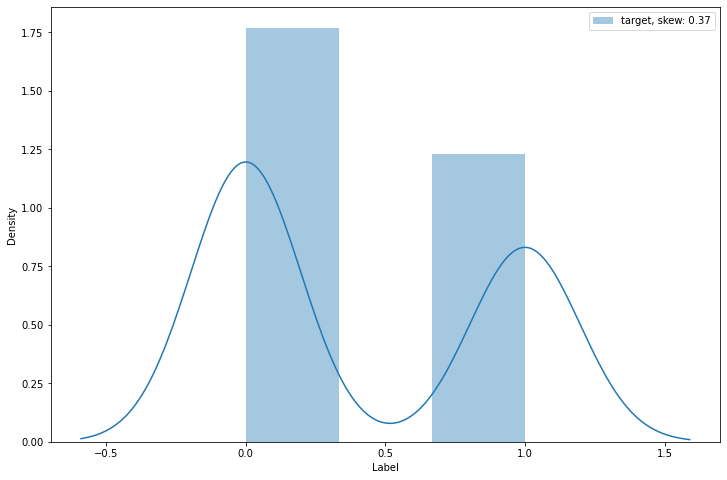

In [53]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

dapat kita lihat pada proses distribusi data pada dataset (narasi) yang saya gunakan, menghasilkan data berupa 59% untuk parameter 0 (non politik) sedangkan 41% untuk parameter 1 (politik)

# Fitur Ekstrasi Menggunakan TF-IDF

## cek label (Parameter 1 (politik) Parameter 0 (non politik))

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
vectorizer = TfidfVectorizer()

In [58]:
politik_reviews = df_new[(df_new["Label"] == 1)]
npolitik_reviews = df_new[(df_new["Label"] == 0)]

## cek label politik

In [59]:
politik_reviews.head()

,Tweets,Label,step01,tokens,final_tokens,step02,finalText_str,ProcessedText
0,Ketua DPP PHRI DKI Jakarta Sutrisno Iwantono b...,1,ketua dpp phri dki jakarta sutrisno iwantono b...,"[ketua, dpp, phri, dki, jakarta, sutrisno, iwa...","[ketua, dpp, phri, dki, jakarta, sutrisno, iwa...",ketua dpp phri dki jakarta sutrisno iwantono b...,ketua dpp phri dki jakarta sutrisno iwantono b...,ketua dpp phri dki jakarta sutrisno iwantono b...
1,"Soalnya, RKUHP yang baru berisi pasal perzinah...",1,soalnya rkuhp yang baru berisi pasal perzinaha...,"[soalnya, rkuhp, yang, baru, berisi, pasal, pe...","[soalnya, rkuhp, yang, baru, berisi, pasal, pe...",soalnya rkuhp yang baru berisi pasal perzinaha...,soalnya rkuhp yang baru berisi pasal perzinaha...,soal rkuhp baru isi pasal perzinahan anggap ru...
2,"#Semuabisakena. Inget, kan, sama kampanye peno...",1,inget kan sama kampanye penolakan rancangan un...,"[inget, kan, sama, kampanye, penolakan, rancan...","[inget, kan, sama, kampanye, penolakan, rancan...",inget kan sama kampanye penolakan rancangan un...,inget kan sama kampanye penolakan rancangan un...,inget kan sama kampanye tolak rancang undang u...
3,"Gugatannya udah kalah. Selanjutnya, Pak Jokowi...",1,gugatannya udah kalah selanjutnya pak jokowi d...,"[gugatannya, udah, kalah, selanjutnya, pak, jo...","[gugatannya, udah, kalah, selanjutnya, pak, jo...",gugatannya udah kalah selanjutnya pak jokowi d...,gugatannya udah kalah selanjutnya pak jokowi d...,gugat udah kalah lanjut pak jokowi para menter...
5,"Menurut LBH Bogor, Irwansyah, pemerintah Kota ...",1,menurut lbh bogor irwansyah pemerintah kota bo...,"[menurut, lbh, bogor, irwansyah, pemerintah, k...","[menurut, lbh, bogor, irwansyah, pemerintah, k...",menurut lbh bogor irwansyah pemerintah kota bo...,menurut lbh bogor irwansyah pemerintah kota bo...,lbh bogor irwansyah perintah kota bogor gugat ...


In [64]:
Politik_1_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
Politik_1_tf_idf = Politik_1_tf_idf_vect.fit_transform(politik_reviews["ProcessedText"].values)

In [65]:
Politik_1_tf_idf.shape

(41, 871)

In [67]:
features = Politik_1_tf_idf_vect.get_feature_names()

idfValues = Politik_1_tf_idf_vect.idf_

d = dict(zip(features, 9 - idfValues))

sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

for i in range(200):
    print(sortedDict[i])

('eliezer', 6.564915474710677)
('dakwa', 6.341771923396467)
('sidang', 6.341771923396467)
('enggak', 6.2082405307719455)
('ferdy', 6.2082405307719455)
('richard', 6.2082405307719455)
('richard eliezer', 6.2082405307719455)
('bunuh', 6.0540898509446865)
('co', 6.0540898509446865)
('ferdy sambo', 6.0540898509446865)
('kasus', 6.0540898509446865)
('narasi', 6.0540898509446865)
('perdana', 6.0540898509446865)
('sambo', 6.0540898509446865)
('aju', 5.871768294150732)
('atas', 5.871768294150732)
('bilang', 5.871768294150732)
('brigadir', 5.871768294150732)
('buat', 5.871768294150732)
('da', 5.871768294150732)
('daily', 5.871768294150732)
('justice', 5.871768294150732)
('kalo', 5.871768294150732)
('narasi daily', 5.871768294150732)
('sama', 5.871768294150732)
('sidang perdana', 5.871768294150732)
('udah', 5.871768294150732)
('yosua', 5.871768294150732)
('acara', 5.648624742836523)
('banget', 5.648624742836523)
('bharada', 5.648624742836523)
('brigadir yosua', 5.648624742836523)
('deh', 5.64862

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [70]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

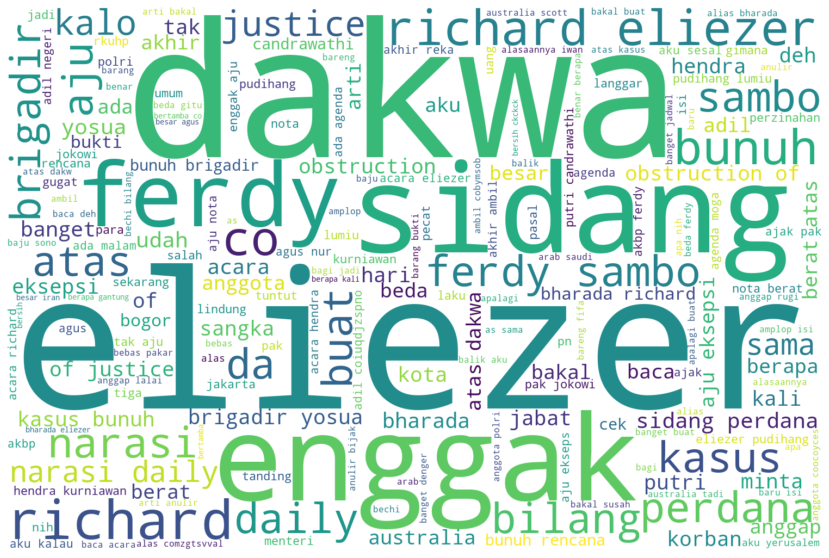

In [71]:
PlotWordCloud(d)

## cek label non politik

In [73]:
npolitik_reviews.head()

,Tweets,Label,step01,tokens,final_tokens,step02,finalText_str,ProcessedText
4,Semoga aja amunisi Kominfo bisa efektif buat n...,0,semoga aja amunisi kominfo bisa efektif buat n...,"[semoga, aja, amunisi, kominfo, bisa, efektif,...","[semoga, aja, amunisi, kominfo, bisa, efektif,...",semoga aja amunisi kominfo bisa efektif buat n...,semoga aja amunisi kominfo bisa efektif buat n...,moga aja amunisi kominfo efektif buat ngeberan...
6,"“Harapan saya untuk Arema, yang meninggal dan ...",0,harapan saya untuk arema yang meninggal dan ja...,"[harapan, saya, untuk, arema, yang, meninggal,...","[harapan, saya, untuk, arema, yang, meninggal,...",harapan saya untuk arema yang meninggal dan ja...,harapan saya untuk arema yang meninggal dan ja...,harap untuk arema tinggal jadi korban suporter...
9,Apa sih etilen glikol dan dietilen glikol yang...,0,apa sih etilen glikol dan dietilen glikol yang...,"[apa, sih, etilen, glikol, dan, dietilen, glik...","[apa, sih, etilen, glikol, dan, dietilen, glik...",apa sih etilen glikol dan dietilen glikol yang...,apa sih etilen glikol dan dietilen glikol yang...,apa etilen glikol dietilen glikol sebab ratus ...
10,"Tidak cuma keluarga, Nanda, sahabat Revan pun ...",0,tidak cuma keluarga nanda sahabat revan pun me...,"[tidak, cuma, keluarga, nanda, sahabat, revan,...","[tidak, cuma, keluarga, nanda, sahabat, revan,...",tidak cuma keluarga nanda sahabat revan pun me...,tidak cuma keluarga nanda sahabat revan pun me...,cuma keluarga nanda sahabat revan rasa amat hi...
11,"Dua hari sebelum peristiwa, Revan sudah berpam...",0,dua hari sebelum peristiwa revan sudah berpami...,"[dua, hari, sebelum, peristiwa, revan, sudah, ...","[dua, hari, sebelum, peristiwa, revan, sudah, ...",dua hari sebelum peristiwa revan sudah berpami...,dua hari sebelum peristiwa revan sudah berpami...,hari peristiwa revan pamit ayah tonton langsun...


In [74]:
NPolitik_1_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
NPolitik_1_tf_idf = NPolitik_1_tf_idf_vect.fit_transform(npolitik_reviews["ProcessedText"].values)

In [75]:
NPolitik_1_tf_idf.shape

(59, 1216)

In [76]:
features = NPolitik_1_tf_idf_vect.get_feature_names()

idfValues = NPolitik_1_tf_idf_vect.idf_

d = dict(zip(features, 9 - idfValues))

sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

for i in range(200):
    print(sortedDict[i])

('narasi', 6.3905620875658995)
('daily', 6.2082405307719455)
('narasi daily', 6.2082405307719455)
('kanjuruhan', 6.102880015114119)
('korban', 5.985096979457735)
('bakal', 5.851565586833212)
('banyak', 5.697414907005954)
('buat', 5.697414907005954)
('peristiwa', 5.697414907005954)
('rem', 5.697414907005954)
('sama', 5.697414907005954)
('aja', 5.515093350212)
('akut', 5.515093350212)
('bakar', 5.515093350212)
('banget', 5.515093350212)
('baru', 5.515093350212)
('deh', 5.515093350212)
('fifa', 5.515093350212)
('gagal', 5.515093350212)
('ginjal', 5.515093350212)
('ginjal akut', 5.515093350212)
('jumlah', 5.515093350212)
('kasus', 5.515093350212)
('orang', 5.515093350212)
('pssi', 5.515093350212)
('tinggal', 5.515093350212)
('apa', 5.2919497988977895)
('api', 5.2919497988977895)
('bintan', 5.2919497988977895)
('bisa', 5.2919497988977895)
('bola', 5.2919497988977895)
('enggak', 5.2919497988977895)
('gagal ginjal', 5.2919497988977895)
('gimana', 5.2919497988977895)
('hasil', 5.29194979889778

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [77]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

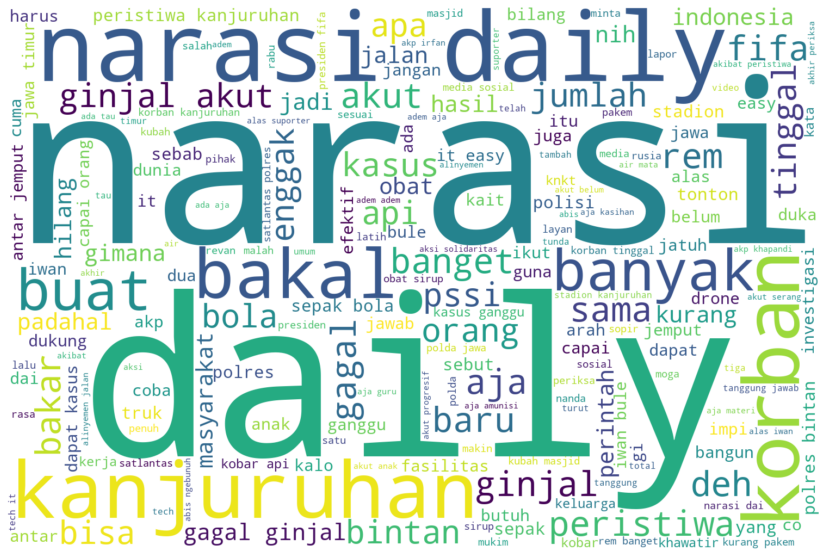

In [78]:
PlotWordCloud(d)

# Cek politik, non politik untuk Semua Label

In [79]:
tfidf_vect = TfidfVectorizer(ngram_range = (1,2))

In [80]:
Data_TFIDF = tfidf_vect.fit_transform(df_new["ProcessedText"].values)

In [81]:
Data_TFIDF.shape

(100, 1981)

## Proses Traning dan Testing dibagi menjadi 70-30
dengan 70 untuk data training, dan 30 untuk data testing

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [89]:
train_TFIDF, test_TFIDF, train_labels_TFIDF, test_labels_TFIDF = train_test_split(dataset_feature, dataset_label, test_size = 0.3, random_state=42)

In [90]:
train_TFIDF.shape, test_TFIDF.shape, train_labels_TFIDF.shape, test_labels_TFIDF.shape

((70,), (30,), (70,), (30,))

# Model -  menggunakan Naive Bayes

In [93]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
classifier_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', MultinomialNB()),
])

In [94]:
parameters_nb = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
    'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100)
}

In [95]:
classifier_nb = GridSearchCV(classifier_nb, parameters_nb, cv = 3, n_jobs=-1)

In [96]:
classifier_nb.fit(train_TFIDF, train_labels_TFIDF.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100),
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3),
                                                (1, 4)]})

## nilai accuracy Training set dan Test set

In [97]:
y_pred_nb_train = classifier_nb.predict(train_TFIDF)
accuracy_nb_train = accuracy_score(train_labels_TFIDF, y_pred_nb_train)
print("Accuracy Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(test_TFIDF)
accuracy_nb_test = accuracy_score(test_labels_TFIDF, y_pred_nb_test)
print("Accuracy Test set: ", accuracy_nb_test)

Accuracy Training set:  1.0
Accuracy Test set:  0.8666666666666667


## nilai Recall Training set dan Test set

In [100]:
recall_nb_train = recall_score(train_labels_TFIDF, y_pred_nb_train, average='weighted')
print("Recall Training set: ", recall_nb_train)

recall_nb_test = recall_score(test_labels_TFIDF, y_pred_nb_test, average='weighted')
print("Recall Test set: ", recall_nb_test)

Recall Training set:  1.0
Recall Test set:  0.8666666666666667


## nilai Precision Training set dan Test set

In [101]:
precision_nb_train = precision_score(train_labels_TFIDF, y_pred_nb_train, average='weighted')
print("Precision Training set: ", precision_nb_train)

precision_nb_test = precision_score(test_labels_TFIDF, y_pred_nb_test, average='weighted')
print("Precision Test set: ", precision_nb_test)

Precision Training set:  1.0
Precision Test set:  0.8666666666666667


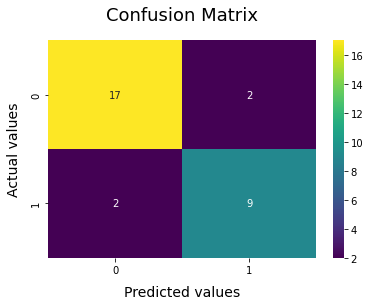

In [102]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_labels_TFIDF, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

# Visualisasi

In [103]:
models = [
          ('Naive Bayes Multinomial', accuracy_nb_train, accuracy_nb_test),                    
         ]

In [104]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Naive Bayes Multinomial,1.0,0.866667


In [105]:
models_comparison = [
                        ('Naive Bayes Multinomial', accuracy_nb_test, recall_nb_test, precision_nb_test),                          
                    ]

In [106]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Naive Bayes Multinomial,0.866667,0.866667,0.866667


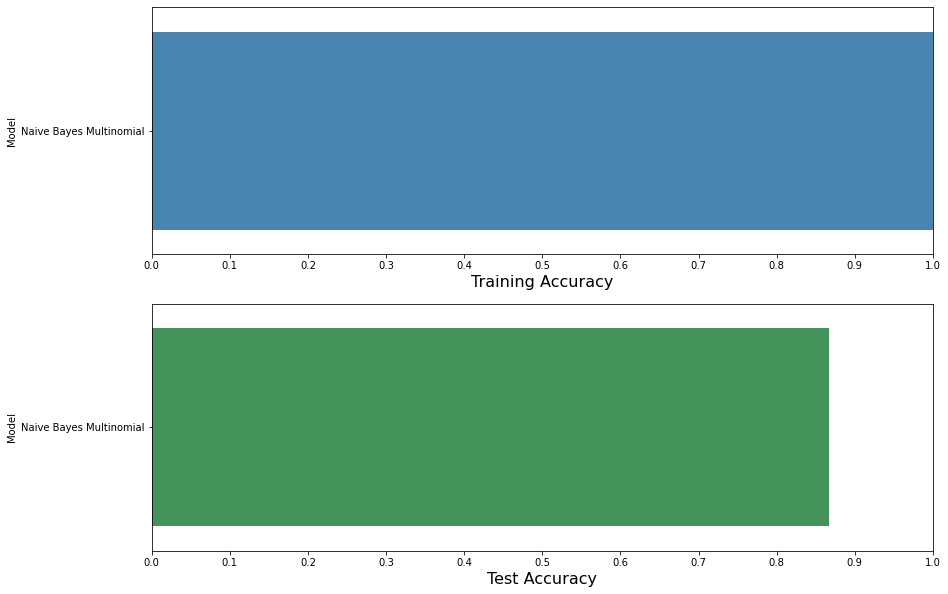

In [107]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

# Kesimpulan

Dari hasil pengujian setelah melakukan proses steming dan stopworld dapat kita lihat bahwa nilai training dan testig memiliki nilai akurasi yang tinggi dimana untuk training memiliki nilai akurasi sebanyak 1.0 sedangkan testing memiliki nilai akurasi 0.87 